<a href="https://colab.research.google.com/github/Louis5228/NTHU-Cell-Labeling/blob/main/Calculate_mean_diameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
import prettytable as pt
import numpy as np
import json
import csv
import math
import cv2
drive.mount('/content/gdrive')

In [45]:
def draw_result(img, minRect, minEllipse):
  plt.figure(figsize=(20,20))
  plt.subplot(121)
  plt.title(file_name, fontsize = 15), plt.xticks([]), plt.yticks([])
  plt.imshow(img)

  # Draw rotated rects + ellipses
  result = np.copy(img)
  for N in range(cell_num):
    # ellipse
    cv2.ellipse(result, minEllipse[N], (0, 255, 0), 2)
    # rotated rectangle
    box = cv2.boxPoints(minRect[N])
    box = np.intp(box)
    cv2.drawContours(result, [box], 0, (255, 0, 0), 2)

  plt.subplot(122)
  plt.title(file_name+'_Result', fontsize = 15), plt.xticks([]), plt.yticks([])
  plt.imshow(result)
  plt.show()
  print('\n')

In [46]:
def print_table(file_name, mean, std):
  tb = pt.PrettyTable()
  tb.field_names = ['Image_name', 'Mean_diameter', 'Std']
  tb.add_row([file_name, mean, std])
  print(tb)

In [71]:
csv_output = '/content/gdrive/My Drive/Cell_Label/PEG-20201223T044732Z-001/單顆.csv'
with open(csv_output, 'w') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Image name', 'Mean Diameter', 'Std'])

+--------------+--------------------+-----+
|  Image_name  |   Mean_diameter    | Std |
+--------------+--------------------+-----+
| 10X PEG_i063 | 211.27965885932724 | 0.0 |
+--------------+--------------------+-----+


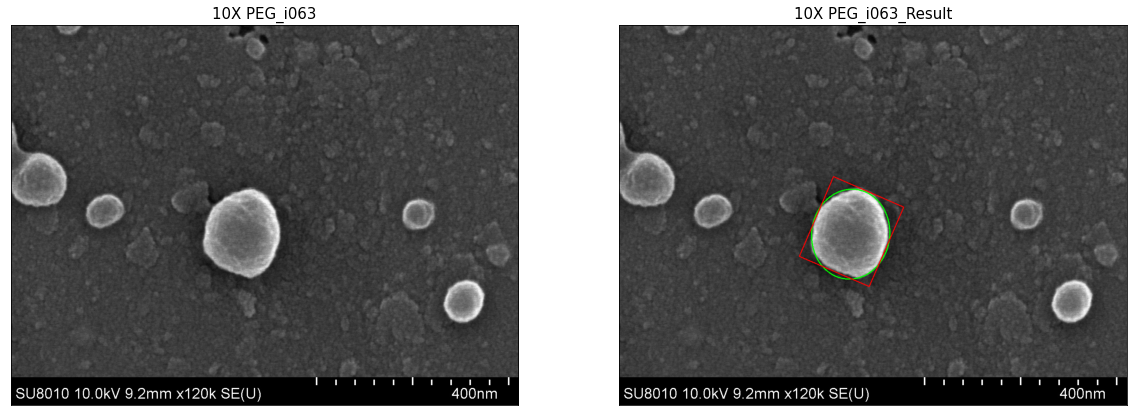



+--------------+--------------------+-----+
|  Image_name  |   Mean_diameter    | Std |
+--------------+--------------------+-----+
| 10X PEG_i064 | 200.35778158182362 | 0.0 |
+--------------+--------------------+-----+


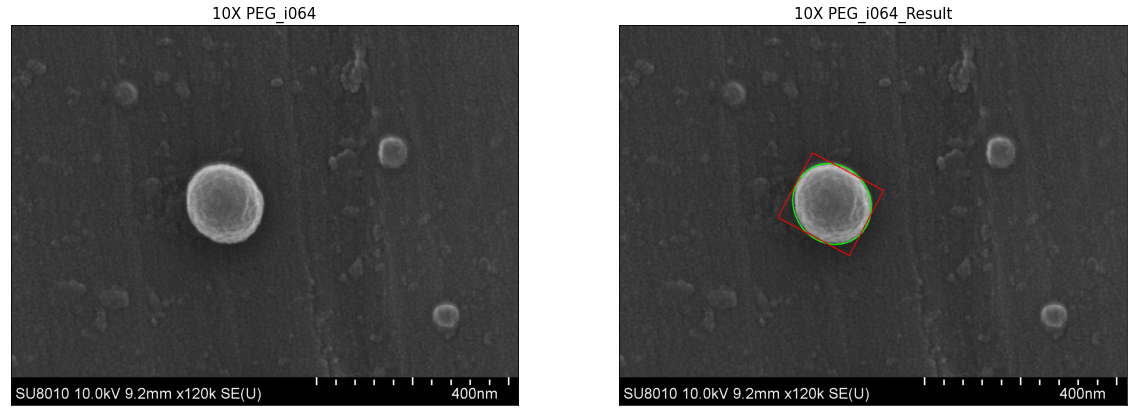



+--------------+--------------------+-----+
|  Image_name  |   Mean_diameter    | Std |
+--------------+--------------------+-----+
| 10X PEG_i065 | 191.23691296423073 | 0.0 |
+--------------+--------------------+-----+


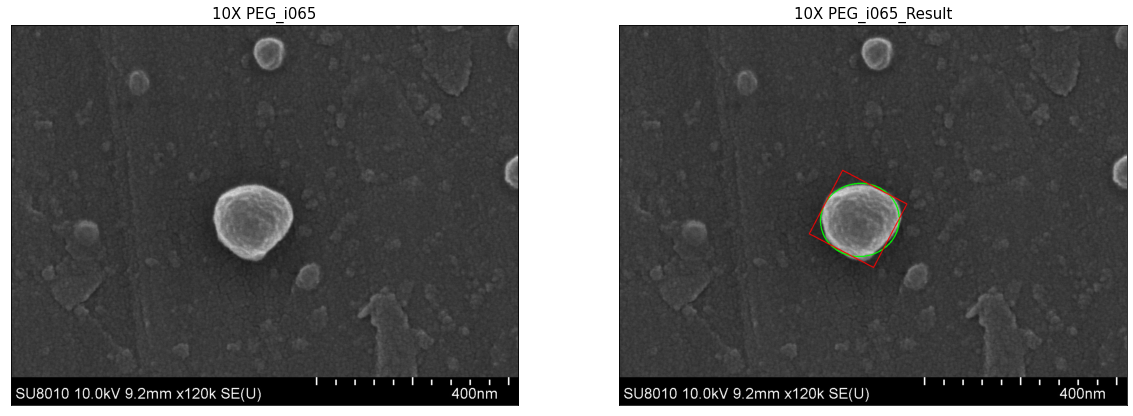

In [73]:
for i in range(63,66):
  file_name = '10X PEG_i0'+str(i)
  file_path = f'/content/gdrive/My Drive/Cell_Label/PEG-20201223T044732Z-001/單顆/{file_name}'

  # Loads the image
  image_input = file_path + '.jpg'
  img = cv2.imread(image_input)
  # Loads the corresponding json file
  json_input = file_path + '.json'
  with open(json_input, 'r') as f:
    data = json.load(f)

  # Calculates how many cells are labeled
  cell_num = len(data["shapes"])

  minRect = [None]*cell_num
  minEllipse = [None]*cell_num
  diameter_list = []

  for N in range(cell_num):
    # Gets label points for each cell
    label_points = np.array(data["shapes"][N]["points"])
    contours = np.round(label_points).astype(int)

    # Gets rotated bounding rectangle of contour
    minRect[N] = cv2.minAreaRect(contours)
    # Gets rotated bounding ellipse of contour
    minEllipse[N] = cv2.fitEllipse(contours)

    # Calculates ellipse area
    a, b = minEllipse[N][1][0] / 2, minEllipse[N][1][1] / 2
    area_ellipse = math.pi * a * b
    # Calculates mean diameter for each cell
    D = math.sqrt(area_ellipse / math.pi) * 2
    
    diameter_list.append(D)

  # Calculatea mean diameter
  mean_diameter = sum(diameter_list) / len(diameter_list)
  # Calculatea standard deviation
  variance = sum([((D - mean_diameter) ** 2) for D in diameter_list]) / len(diameter_list)
  std = variance ** 0.5

  # Print mean and std table
  print_table(file_name, mean_diameter, std)
  # Draw the origin image and result image
  draw_result(img, minRect, minEllipse)
  
  # Add data to csv file
  # with open(csv_output, '+a') as csvfile:
  #   writer = csv.writer(csvfile)
  #   writer.writerow([file_name, mean_diameter, std])